In [1]:
import tensorflow as tf



In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

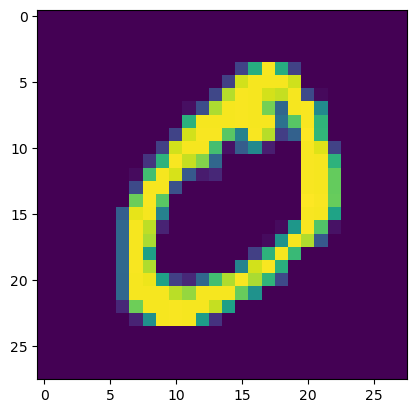

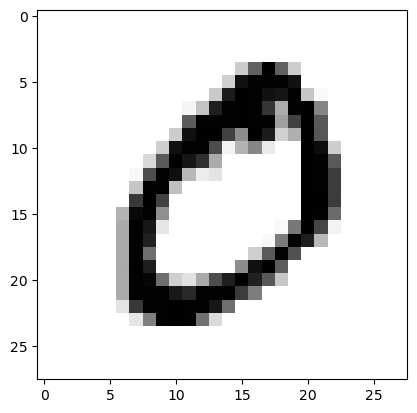

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train[1] , cmap = plt.cm.binary)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

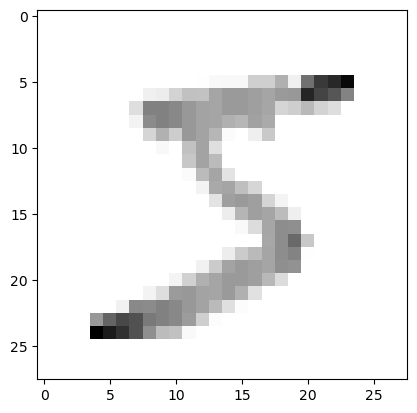

In [7]:
x_train = tf.keras.utils.normalize (x_train, axis = 1)

plt.imshow(x_train[0], cmap = plt.cm.binary)

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


In [10]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE,  IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE,  IMG_SIZE, 1)
print ("Training sample dimension", x_trainr.shape)
print ("Testing sample dimension", x_testr.shape)

Training sample dimension (60000, 28, 28, 1)
Testing sample dimension (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
model = Sequential()

## first layer
model.add(Conv2D (64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling single maximum calue of 2*2

##second layer
model.add(Conv2D (64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling single maximum calue of 2*2

##third layer
model.add(Conv2D (64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling single maximum calue of 2*2

##fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu")) 

##fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu")) 

model.add(Dense(10))
model.add(Activation("softmax")) 


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [14]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [16]:
model.fit(x_trainr,y_train, batch_size = 1, epochs=5, validation_split = 0.3 )

Epoch 1/5


42000/42000 [==============================] - 332s 8ms/step - loss: 0.2190 - accuracy: 0.9344 - val_loss: 0.1023 - val_accuracy: 0.9723
Epoch 2/5
42000/42000 [==============================] - 255s 6ms/step - loss: 0.1166 - accuracy: 0.9687 - val_loss: 0.1074 - val_accuracy: 0.9707
Epoch 3/5
42000/42000 [==============================] - 235s 6ms/step - loss: 0.0980 - accuracy: 0.9743 - val_loss: 0.1149 - val_accuracy: 0.9678
Epoch 4/5
42000/42000 [==============================] - 232s 6ms/step - loss: 0.0971 - accuracy: 0.9763 - val_loss: 0.0879 - val_accuracy: 0.9798
Epoch 5/5
42000/42000 [==============================] - 234s 6ms/step - loss: 0.0936 - accuracy: 0.9778 - val_loss: 0.1310 - val_accuracy: 0.9689


In [17]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 2947.7891 - accuracy: 0.8680
Test loss on 10,000 test samples 2947.7890625
Validation Accuracy on 10,000 test samples 0.8679999709129333


In [18]:
predictions = model.predict([x_testr])

313/313 [==============================] - 2s 7ms/step


In [19]:
print(predictions)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
print(np.argmax(predictions[0]))

7


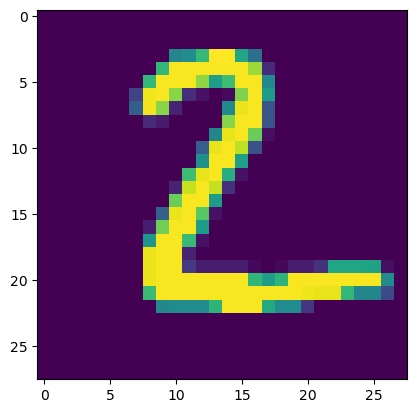

In [22]:
plt.imshow(x_test[1])

In [23]:
print(np.argmax(predictions[2]))

1


In [ ]:
plt.imshow(x_test[0])